In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# regression model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# for save Python objects to a file
import pickle

# others
import warnings

warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True

random_state = 42
np.random.seed(random_state)

In [35]:
# load data
df = pd.read_csv('employee_data.csv')

# dataset information
print("Shape of dataset:", df.shape)
display(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe (numeric columns):")
display(df.describe())

Shape of dataset: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel         

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Total Missing values: 0

Categorical features unique values:


BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

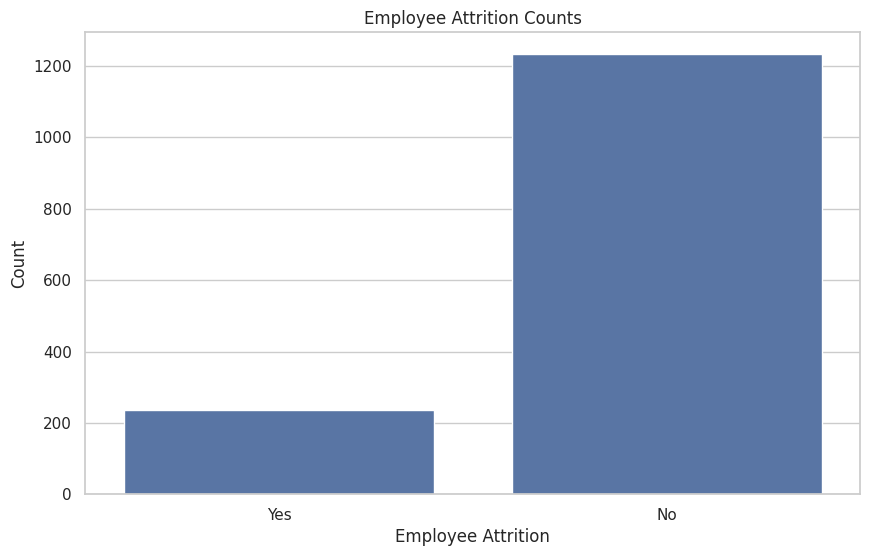

In [36]:
# EmployeeNumber is just like a EmployeeId, so drop this column
# EmployeeCount and StandardHours has no variation, so drop this column
df.drop(columns=['EmployeeCount', 'StandardHours', 'EmployeeNumber'], inplace=True, errors='ignore')

# target and feature
target_col = "Attrition"

X = df.drop(columns=[target_col])
y = df[target_col]

numeric_cols = list(X.select_dtypes(include = ['int64','float64']).columns)
categorical_cols = list(X.select_dtypes(include = ['object']).columns)

# basic information
print('Total Missing values:', df.isnull().sum().sum())
print('\nCategorical features unique values:')
display(df[categorical_cols].nunique())

# class counts
sns.countplot(x=target_col, data=df)
plt.title("Employee Attrition Counts")
plt.xlabel("Employee Attrition")
plt.ylabel("Count")
plt.show()

In [37]:
# Ordinal Encoding for target column
order = {"Yes":1,"No":0}
df[target_col]=df[target_col].map(order).astype(int)

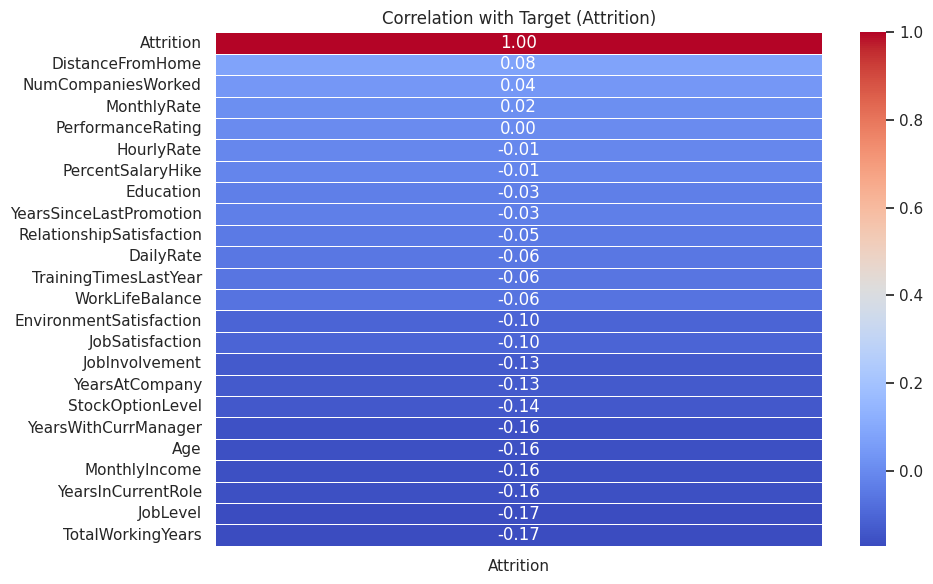

In [38]:
corr = df[numeric_cols + [target_col]].corr()

corr_attrition = corr[['Attrition']].sort_values(by='Attrition', ascending=False)

sns.heatmap(corr_attrition, annot=True, cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title('Correlation with Target (Attrition)')
plt.tight_layout()
plt.show()

In [39]:
# for c in categorical_cols:
#     sns.countplot(data=df, x=c)
#     plt.title(c + " Distribution of Employees")
#     plt.xlabel(c)
#     plt.ylabel("Frequency")
#     plt.xticks(rotation=30)
#     plt.tight_layout()
#     plt.show()

In [40]:
# Every employee is Over18, so drop this column
df.drop(columns=['Over18'], inplace=True, errors='ignore')

if "Over18" in categorical_cols:
    categorical_cols.remove("Over18")

In [41]:
# for c in categorical_cols:
#     ct = pd.crosstab(df[c], df["Attrition"], normalize="index")
#     print(f"\nAttrition proportion by {c}:")
#     display(ct)
#     ct.plot(kind="bar", stacked=True)
#     plt.title(f"Attrition proportion by {c}")
#     plt.ylabel("Proportion")
#     plt.xticks(rotation=30)
#     plt.tight_layout()
#     plt.show()

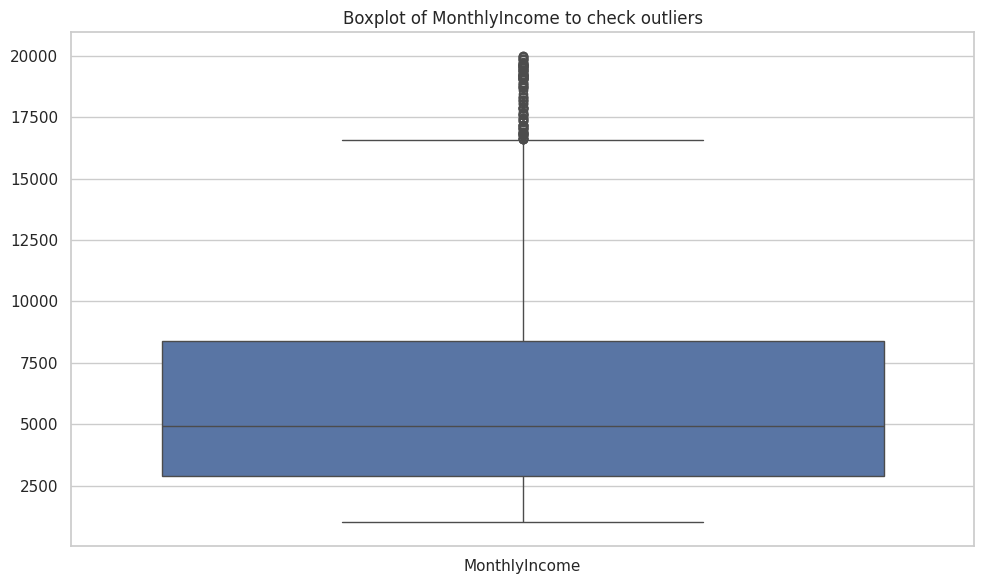

In [42]:
# MonthlyIncome (usually income may have outlier) outlier check
sns.boxplot(data=df[['MonthlyIncome']])
plt.title("Boxplot of MonthlyIncome to check outliers")
plt.tight_layout()
plt.show()

### Preprocessing

In [43]:
# Label encode OverTime (categorical binary columns)
le = LabelEncoder()
if 'OverTime' in categorical_cols:
    categorical_cols.remove('OverTime')
    numeric_cols.append('OverTime')
    df['OverTime'] = le.fit_transform(df['OverTime'])

# Cap MonthlyIncome outlier
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df['MonthlyIncome'] = df['MonthlyIncome'].clip(lower, upper)


### Pipeline

In [44]:
# for numerical
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

# for categorical
cat_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# combine
preprocessor = ColumnTransformer(
    transformers= [
        ('num',num_transformer,numeric_cols),
        ('cat',cat_transformer,categorical_cols)
    ]
    )

In [45]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=random_state,
)

print('Train :',X_train.shape)
print('Test :',X_test.shape)

Train : (1102, 31)
Test : (368, 31)
